# Import

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob
import sys, os

from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# PreProcessing

In [2]:
IMAGE_SIZE=[200,200]

In [4]:
train_path = r'D:\Projects\ML\Datasets\dogs-vs-cats\dir\train'
test_path = r'D:\Projects\ML\Datasets\dogs-vs-cats\dir\test'

In [5]:
image_files=glob(train_path+'/*/*.jpg')
valid_files=glob(test_path+'/*/*.jpg')

In [6]:
len(image_files), len(valid_files)

(3025, 1144)

# VGG

In [7]:
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input

In [8]:
batch_size=128

gen=ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1,
    horizontal_flip=True, preprocessing_function=preprocess_input)


train_generator=gen.flow_from_directory(train_path, shuffle=True, target_size=IMAGE_SIZE, batch_size=batch_size,)
valid_generator=gen.flow_from_directory(test_path, target_size=IMAGE_SIZE, batch_size=batch_size,)

Found 3025 images belonging to 2 classes.
Found 1144 images belonging to 2 classes.


In [ ]:
vgg = PretrainedModel(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)
vgg.trainable = False

In [ ]:
x = Flatten()(vgg.output)
x = Dense(2, activation='softmax')(x)

modelVgg = Model(inputs=vgg.input, outputs=x)

modelVgg.summary()

In [ ]:
modelVgg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

r=modelVgg.fit_generator(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    steps_per_epoch=int(np.ceil(len(image_files)/batch_size)),
    validation_steps=int(np.ceil(len(valid_files)/batch_size)),
)

In [ ]:
print("Training: ", model.evaluate(x_train, y_train))
print("Testing: ", model.evaluate(x_test, y_test))

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.show()

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.show()

# MobileNet

In [9]:
from tensorflow.keras.applications.mobilenet import MobileNet as PretrainedModel, preprocess_input

In [10]:
batch_size=128

gen=ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1,
    horizontal_flip=True, preprocessing_function=preprocess_input)


train_generator=gen.flow_from_directory(train_path, shuffle=True, target_size=IMAGE_SIZE, batch_size=batch_size,)
valid_generator=gen.flow_from_directory(test_path, target_size=IMAGE_SIZE, batch_size=batch_size,)

Found 3025 images belonging to 2 classes.
Found 1144 images belonging to 2 classes.


In [11]:
mbn = PretrainedModel(input_shape = IMAGE_SIZE+[3], weights ='imagenet', include_top = False)  #imports the mobilenet model and discards the last 1000 neuron layer.
mbn.trainable = False

E:\Anaconda3\envs\myenv1\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [12]:
x = Flatten()(mbn.output)
x = Dense(2, activation='softmax')(x)

modelMbn = Model(inputs=mbn.input, outputs=x)

modelMbn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 201, 201, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 100, 100, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 100, 100, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 100, 100, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 100, 100, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 100, 100, 32)      128   

In [13]:
modelMbn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

m=modelMbn.fit_generator(
    train_generator,
    validation_data=valid_generator,
    epochs=15,
    steps_per_epoch=int(np.ceil(len(image_files)/batch_size)),
    validation_steps=int(np.ceil(len(valid_files)/batch_size)),
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 24 steps, validate for 9 steps
Epoch 1/15
24/24 [==============================] - 66s 3s/step - loss: 0.8507 - accuracy: 0.8820 - val_loss: 1.2014 - val_accuracy: 0.9030
Epoch 2/15
24/24 [==============================] - 60s 2s/step - loss: 0.3391 - accuracy: 0.9564 - val_loss: 0.3220 - val_accuracy: 0.9633
Epoch 3/15
24/24 [==============================] - 60s 2s/step - loss: 0.1750 - accuracy: 0.9719 - val_loss: 0.4430 - val_accuracy: 0.9554
Epoch 4/15
24/24 [==============================] - 59s 2s/step - loss: 0.0906 - accuracy: 0.9788 - val_loss: 0.2689 - val_accuracy: 0.9624
Epoch 5/15
24/24 [==============================] - 59s 2s/step - loss: 0.0942 - accuracy: 0.9792 - val_loss: 0.5419 - val_accuracy: 0.9502
Epoch 6/15
24/24 [==============================] - 59s 2s/step - loss: 0.0885 - accuracy: 0.9835 - val_loss: 0.3535 - val_accuracy: 

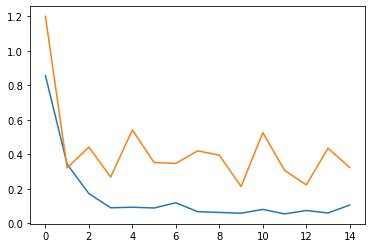

In [14]:
plt.plot(m.history['loss'], label='loss')
plt.plot(m.history['val_loss'], label='val_loss')
plt.show()

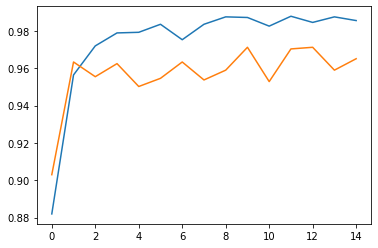

In [15]:
plt.plot(m.history['accuracy'], label='accuracy')
plt.plot(m.history['val_accuracy'], label='val_accuracy')
plt.show()